In [1]:
SensorNum=1 # Sensor number
WindowWidth=[16,32,64,128,256,512,1024] # Window Width
OverlapArray=[4,8,16,32,64,128,256] # sliding window
width=3000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
Axis='AccX' # Axis

WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/2016-07-25"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib
import matplotlib.pyplot as plt
import pylab
import pickle
import copy
import processing
import datetime
import multiprocessing as mp
import processing

%matplotlib inline

In [3]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [4]:
if not os.path.exists(WORKSPACE_PATH+'/study/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/study/'+DataName+'/')
StudyDataPath=WORKSPACE_PATH+'/study/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/loss/'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/loss/')
GlaphDataPath=WORKSPACE_PATH+'/graph/'+DataName+'/loss/'

if not os.path.exists(WORKSPACE_PATH+'/graph/'+DataName+'/Time/'): os.makedirs(WORKSPACE_PATH+'/graph/'+DataName+'/Time/')
GlaphDataTimePath=WORKSPACE_PATH+'/graph/'+DataName+'/Time/'

if not os.path.exists(WORKSPACE_PATH+'/modelPic/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/modelPic/'+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+'/modelPic/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/window/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/window/'+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+DataName+'/'

RawDataPath="/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/raw/"

hiden node = 4
Graph range=0 : 3000
Graph range=3000 : 6000
Graph range=6000 : 9000
Graph range=9000 : 12000
Graph range=12000 : 15000
Graph range=15000 : 18000
Graph range=18000 : 21000
Graph range=21000 : 24000
Graph range=24000 : 27000
Graph range=27000 : 30000
Graph range=30000 : 33000
Graph range=33000 : 36000
Graph range=36000 : 39000
Graph range=39000 : 42000
Graph range=42000 : 45000
Graph range=45000 : 48000
Graph range=48000 : 51000
Graph range=51000 : 54000
Graph range=54000 : 57000
Graph range=57000 : 60000
Graph range=60000 : 63000
Graph range=63000 : 66000
Graph range=66000 : 69000
Graph range=69000 : 72000
Graph range=72000 : 75000
Graph range=75000 : 78000
Graph range=78000 : 81000
Graph range=81000 : 84000
Graph range=84000 : 87000
Graph range=87000 : 90000
Graph range=90000 : 93000
Graph range=93000 : 96000
Graph range=96000 : 99000
Graph range=99000 : 102000
Graph range=102000 : 105000
Graph range=105000 : 108000
Graph range=108000 : 111000
Graph range=111000 : 11400

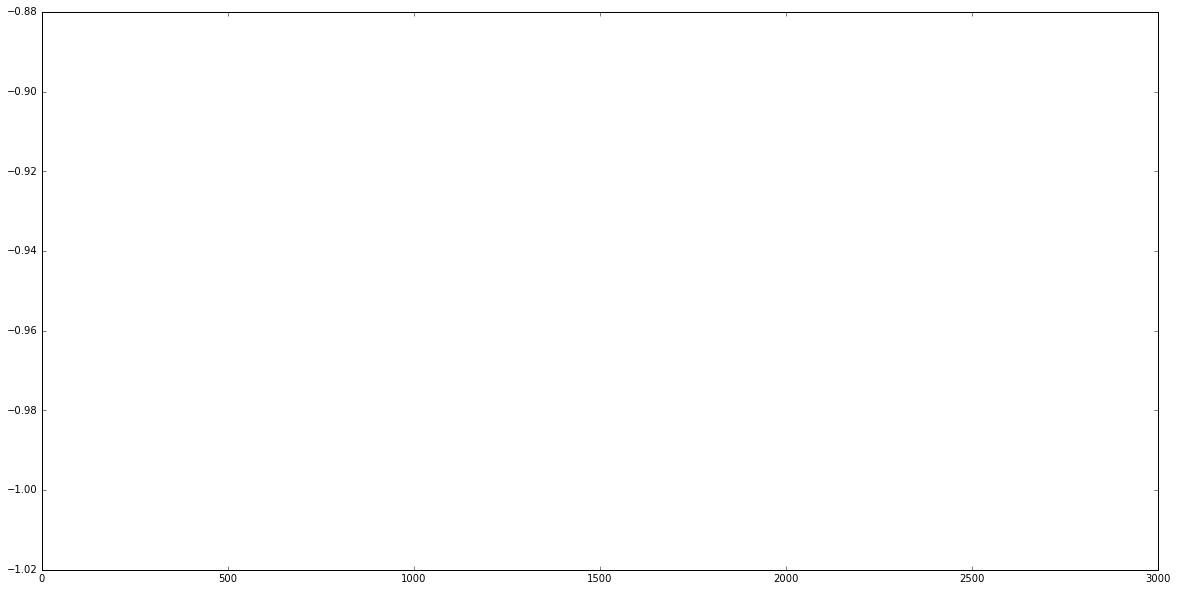

In [5]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    # define SaveFileName
    for encoding_dim in EncodingDim:
        print "hiden node = "+str(encoding_dim)
        SaveFileNameEncord=DataName+'_encoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameDecord=DataName+'_decoded'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameNet=DataName+'_net'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTrain=DataName+'_train'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameTest=DataName+'_test'+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap*100)
        SaveFileNameGraph= GlaphDataTimePath+'_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)

        #window = processing.LoadDicDataFromFileNPZ(StudyDataPath+SaveFileNameTrain)
        window = processing.LoadDicDataFromFileNPZ(WindowDataPath+SaveFileNameTrain)
        wind = window.reshape(window.size,1)
        reconstructData = processing.LoadDicDataFromFileNPZ(StudyDataPath+SaveFileNameDecord)
        reconst = reconstructData.reshape(reconstructData.size,1)
        
        for i in range(width, wind.size, width):
            start =i-width 
            goal=i

            dataE = wind[start:goal]
            dataD = reconst[start:goal]

            ax.plot(range(0,len(dataE)),dataE,'r',label="raw data")
            ax.plot(range(0,len(dataD)),dataD,'b',label="reconstruct")
            ax.legend(loc='best',fontsize=10)
            ax.set_title(str(start)+"-"+str(goal))
            ax.figure.savefig(SaveFileNameGraph+'-'+str(start)+"-"+str(goal)+'-glaph')
            ax.clear()
            print 'Graph range='+str(start)+' : '+str(goal)
            time.sleep(5)